### **Data Science 2001 Final Project**

Data Science practicum Section 10 

by: Tiffany T. Nguyen & Madeleine King





# From sharing our experiences of international travel with each other, we both realized that the economy, culture, and wealth between the United States and other countries vary significantly. 

While Tiffany routinely travels to Vietnam to visit her relatives, Maddy has also lived in Singapore and other neighboring Asian countries for her parents' jobs. As these experiences allowed us to experience new customs, lifestyle, and economies, we realized that we were interested in examining factors of economic wealth and life expectancy across the world. We believing that experiencing international travel and living has allowed us to broaden our worldviews, exposure, and open-mindedness that will help us evaluate the economies and customs of various regions.

Although there are many metrics that we could use to compare different areas
 of the world, we decided to primarily look at datasets about **annual GDP per capita and life expectancy rates.**





## Experiment 1: What is Life Expectancy and GDP per capita? 

As **Life expectancy** is defined as the average expected time period an individual is expected to live, this statistic is usually taken as the average age of mortality of a selected group of individuals.

**GDP per capita** is measured by the sum of gross value of all producers in the economy with product taxes included divided by total population of that country. 

## Selecting Our Data Time Period and Countries:

To best represent our international data science comparison regarding these two metrics, we decided to choose countries from various parts of the globe including the **United States, Vietnam, Australia, Bolivia, and Ukraine.**

Not only will reading data from these various regions allow us to compare correlations across the different continents, but it will also allow us to look into more research questions for the later portions of our project. 

To obtain our data, we researched multiple sites and decided to download csv files from worldbank and world in data, as these websites provide many different countries, years, and metrics to choose from. Especially as we wanted our project's data to be as current as possible, we decided to use 2005-2015 as our time period of comparison. This specific period would ensure that both GDP per capita life expectancy data files would have appropriate amounts of data. 

*Source websites: *

https://ourworldindata.org/grapher/gdp-per-capita-worldbank
GDP data goes from 1990 to 2020

https://ourworldindata.org/life-expectancy
Life expectancy data goes from 1950 to 2019



# **Cleaning Our Data**##

Through our DS 2000 class lectures, we learned that available data sets almost always need to be filtered and cleaned to account for puncutation, spacing, and various data elements we are specifically looking for. Especially as both our life expectancy and GDP data files are very long, our read data functions read the files into lists of dictionaries.

Afterwards, our filter functions were able to read only the necessary country names, years, and GDP per capita to allow us to extract only the necessary metrics for our 5 chosen countries. 

In [ ]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#CONSTANTS GO HERE

from google.colab import drive
drive.mount('/content/gdrive/')

GDP_FILE = "/content/gdrive/MyDrive/DS2001FinalProject!/gdp-per-capita-worldbank.csv"
#'DS2001FinalProject!/gdp-per-capita-worldbank.csv'
LIFE = "/content/gdrive/MyDrive/DS2001FinalProject!/life-expectancy.csv"
#"life-expectancy.csv"

YEARS = [2005,2006,2007,2008,2009,2010
          ,2011,2012,2013,2014,2015]

YEARS_TEST =[2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,
             2024,2025,2026,2027,2028,2029,2030]


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
def read_gdp(FILE_NAME, coltypes, delimiter = ','):
    
    """
Read a csv file to a list of dictionaries
    filename - the name of the file.  File must have a header.
    coltypes - the data type for each column (int, float, str)
    delimiter - field delimiter (Default: ',')
  
    Return: a table of data as a list of dictionaries
    """
    
    gdp_dict = []
    
    with open(FILE_NAME, 'r') as infile:
        
        # read the header
        header = infile.readline().strip().split(delimiter)
            
        # Read remaining lines
        for line in infile:
            rowdict = {}
            
            # parse values
            vals = line.strip().split(delimiter)
            
            # Store key value pairs

            for i in range(len(vals)):
                key = header[i]
                value = vals[i]
                if value != '':
                    value = coltypes[i](value)
                rowdict[key] = value
                
            gdp_dict.append(rowdict) # add row to data
        
    return gdp_dict

In [ ]:
def read_life_expectancy(FILE_NAME, coltypes, delimiter = ','):
    
    """
Read a csv file to a list of dictionaries
    filename - the name of the file.  File must have a header.
    coltypes - the data type for each column (int, float, str)
    delimiter - field delimiter (Default: ',')
  
    Return: a table of data as a list of dictionaries
    """
    
    gdp_dict = []
    
    with open(FILE_NAME, 'r') as infile:
        
        # read the header
        header = infile.readline().strip().split(delimiter)
            
        # Read remaining lines
        for line in infile:
            rowdict = {}
            
            # parse values
            vals = line.strip().split(delimiter)
            
            # Store key value pairs

            for i in range(len(vals)):
                key = header[i]
                value = vals[i]
                if value != '':
                    value = coltypes[i](value)
                rowdict[key] = value
                
            gdp_dict.append(rowdict) # add row to data
    # returning our GDP per capita in a dictionary
    return gdp_dict

In [ ]:
def filter_country(life_list, country):
    """
    This function filters the countrys from our life expectancy list given a country name

    Paraneters: list, country_name

    Returns: none
    """
  # function for filtering for the countries we want 
    country_list_exp = []
    for i in range(len(life_list)): #iterating through list
        if life_list[i]['Entity'] == country:
            country_list_exp.append(life_list[i])
            
    return country_list_exp

In [ ]:
def filter_years(country_list_gdp,country_list_exp,country_name):
    """
    This function filters the years of our country list of GDP per capita values and life expectancy list values, given a country name

    Parameters: 
    - list of country gdp 
    - list of country life expectancy
    - country name

    Returns: 
    - list of GDP per capita and life expectancy
    """
    # creating lists
    gdp_list_data = []
    life_list_data = []
 
    #iterating through country list 
    for i in country_list_gdp:     
        # name of country key
        entity_check = i['Entity']
        # year key
        year_check_gdp = i['Year']
        
        #checking of the country data matches our given name and year constraints
        if entity_check == country_name and year_check_gdp in YEARS:
        
            gdp_check = i['GDP per capita'] #reading the GDP per capita

            #appending the GDP to list
            gdp_list_data.append(gdp_check)  
    #iteraing through life expect list
    for j in country_list_exp:
         
         entity_check = j['Entity'] #country name
        
         year_check_life = j['Year'] #year check
        
        #checking of the country data matches our given name and year constraints
         if entity_check == country_name and (year_check_life in YEARS):
            
            #life expectancy check
             exp_check = j['Life expectancy']
            #appending life expect to list
             life_list_data.append(exp_check)
    
    return gdp_list_data,life_list_data

## **Are higher socioeconomic countries more likely to experience higher correlation between life expectancy and GDP per capita?**

## **Hypothesis 1:**

**For our first portion of our project, 
we hypothesize that countries with higher national development (human development index) are more likely to experience higher correlation between life expectancy and GDP per capita due to individuals being able to live longer, earn more income, and contribute to their country's economy for a longer period of time.**

# Executing the Correlation Test

We will conduct the correlation test for each of our 5 countries and evaluate whether higher socionecomic countries (closer to first world) yield higher correlations between life expectancy and GDP per capita!

In [ ]:
def print_expl_r():
    """
    This function prints our beginning statement, to be shown above our output

    Parameters: none
    Return: none
    """
    print()
    print("Output: Correlation Test 1")
    print('~~~~~~~~~~~~~~~~~~~~~~')
    
    print()
    print("Life expectancy dictates the average period that an individual lives. Based on this definition, ")
    print("we predict that countries with a higher life expectancy will be able to produce a greater ")
    print("overall GDP due to being able to have more time to go to school, work and contribute to the national economy ")
    print()
    print('Our following hypothesis:     There will be higher correlations between life expectancy and GDP in first-world and second-world countries')

In [ ]:
def calc_r(gdp_list_data,life_list_data,country_name):
    """
    This function calculates the r value to find the correlation between the inputs GDP per capita and Life expectancy
    Given a country name

    Parameters: none
    Return: none
    """
    
    corr = (np.corrcoef(gdp_list_data,life_list_data))
    
    corr_var = corr[0,1]
    
    corr_var = round(corr_var,3)
    
    print()
    print('                            ',country_name,":")
    
    print('------------------------------------------------------------------------------')
    print('|                                                                            |')
    print('|        "Correlation between GDP per capita and life expectancy"            |')
    print('|                              (2005-2015)                                   |')
    print('|                                                                            |')
    print('|                             ',corr_var,'                                        |')
    print('|                                                                            |')
    print('------------------------------------------------------------------------------')
    
    
    if corr_var < 0.2:
         print('The correlation between GDP and life expectancy (2005-2015) for',country_name,'appears to be none')   
    elif corr_var > 0.2 and corr_var <= 0.39:
         print('The correlation between GDP and life expectancy (2005-2015) for',country_name,'appears to be weak')  
    elif corr_var > 0.4 and corr_var < 0.59:
         print('The correlation between GDP and life expectancy (2005-2015) for ',country_name,'appears to be moderate')
    elif corr_var > 0.6 and corr_var < 0.79:
         print('The correlation between GDP and life expectancy (2005-2015) for',country_name,'appears to be strong')
    elif corr_var > 0.8 and corr_var < 1:
         print('The correlation between GDP and life expectancy (2005-2015) for',country_name,'appears to be very strong')
        
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print()

## **Visualizing the Relationship between Life Expectancy & GDP per Capita (2005-2015)**

In [ ]:
def visualize_corr(corr_val,gdp_list_data,life_list_data,country):
    """
    This function visualizes our correlation using 2 subplots
    It takes in our correlation value, the list of gdp per capita data, the life expectancy list, and the given country 

    Parameters: none
    Return: none
    """
    # visualizing our subplots
    fig, (axis1, axis2) = plt.subplots(2)
    fig.suptitle("Visual of Life Expectancy and GDP per Capita [2005-2015]")
    # axis 1 showing life expectancy
    axis1.set_title(country)
    axis1.plot(gdp_list_data[1],label='Life Expectancy',color='purple')
    axis1.legend(['Life Expectancy'])
    axis1.set_ylabel("Life Expectancy Period")
    axis1.grid()
    # axis 2 showing GDP per capita
    axis2.plot(gdp_list_data[0],label='GDP per Capita',color='green')
    plt.xlabel("Years 2005-2015")
    plt.ylabel("Currency for the Country")
    axis2.grid()
    plt.legend()   

## **Executing Correlation Calculations!**

In [ ]:
  #this portion of our code is dedicated towards executing 
  
  # reading our GDP data file
  data_gdp = read_gdp(GDP_FILE,coltypes = [str,str,int,float])
  # reading our life expectancy data file
  life_list = read_life_expectancy(LIFE, coltypes=[str, str, int, float],delimiter = ',')
  # cleaning our countries' GDP data
  cleaning_gdp_aust = filter_country(data_gdp,"Australia")
  cleaning_gdp_bolivia = filter_country(data_gdp,"Bolivia")
  cleaning_gdp_ukraine = filter_country(data_gdp,"Ukraine")
  cleaning_gdp_usa = filter_country(data_gdp,"United States")
  cleaning_gdp_viet = filter_country(data_gdp,"Vietnam")
  
  # cleaning our countries' life expectancy data
  life_usa = filter_country(life_list,"United States")
  life_viet = filter_country(life_list,"Vietnam")
  life_bolivia = filter_country(life_list,"Bolivia")
  life_ukraine = filter_country(life_list,"Ukraine")
  life_aust = filter_country(life_list,"Australia")
  
  # printing our explanation of r
  print_expl_r()

  # filtering Australia's data and calculating the r between gdp & life expectancy
  aust_filtering = filter_years(cleaning_gdp_aust,life_aust,"Australia")
  calculating_r_aust = calc_r(aust_filtering,aust_filtering,"Australia")

  # filtering Bolivia's data and calculating the r between gdp & life expectancy
  bolivia_filtering = filter_years(cleaning_gdp_bolivia, life_bolivia, "Bolivia")
  calculating_r_bol = calc_r(bolivia_filtering,bolivia_filtering, "Bolivia")

  # filtering Ukraine's data and calculating the r between gdp & life expectancy
  ukraine_filtering = filter_years(cleaning_gdp_ukraine, life_ukraine, "Ukraine")
  calculating_r_ukraine = calc_r(ukraine_filtering,ukraine_filtering,"Ukraine")

  # filtering United States' data and calculating the r between gdp & life expectancy
  USA_filtering = filter_years(cleaning_gdp_usa,life_usa,"United States")
  calculating_r_us = calc_r(USA_filtering,USA_filtering,"United States")

  # filtering Vietnam's data and calculating the r between gdp & life expectancy
  viet_filtering = filter_years(cleaning_gdp_viet,life_viet,"Vietnam")
  calculating_r_viet = calc_r(viet_filtering,viet_filtering,"Vietnam")


Output: Correlation Test 1
~~~~~~~~~~~~~~~~~~~~~~

Life expectancy dictates the average period that an individual lives. Based on this definition, 
we predict that countries with a higher life expectancy will be able to produce a greater 
overall GDP due to being able to have more time to go to school, work and contribute to the national economy 

Our following hypothesis:     There will be higher correlations between life expectancy and GDP in first-world and second-world countries

                             Australia :
------------------------------------------------------------------------------
|                                                                            |
|        "Correlation between GDP per capita and life expectancy"            |
|                              (2005-2015)                                   |
|                                                                            |
|                              0.985                                      

# **Australia Visualization of Life Expectancy & GDP per Capita**

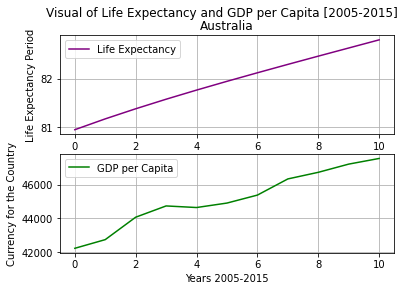

In [ ]:
visualizing_r_aus = visualize_corr(calculating_r_aust,aust_filtering,aust_filtering,"Australia")

# **Bolivia Visualization of Life Expectancy & GDP per Capita**

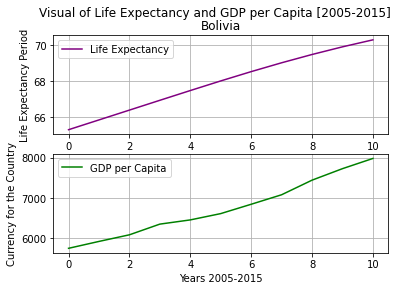

In [ ]:
visualizing_r_bol = visualize_corr(calculating_r_bol,bolivia_filtering,bolivia_filtering,"Bolivia")

# **Ukraine Visualization of Life Expectancy & GDP per Capita**

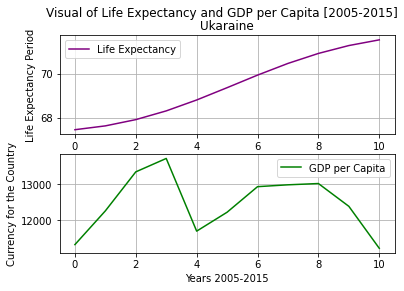

In [ ]:
visualizing_r_ukraine = visualize_corr(calculating_r_ukraine,ukraine_filtering,ukraine_filtering,"Ukaraine")

# **United States Visualization of Life Expectancy & GDP per Capita**

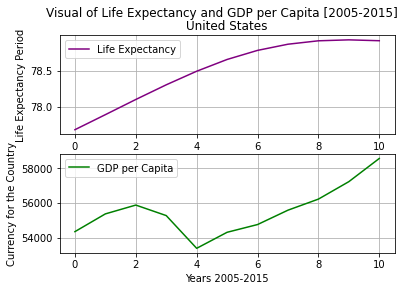

In [ ]:
visualizing_r_us = visualize_corr(calculating_r_us,USA_filtering,USA_filtering,"United States")

# **Vietnam Visualization of Life Expectancy & GDP per Capita**

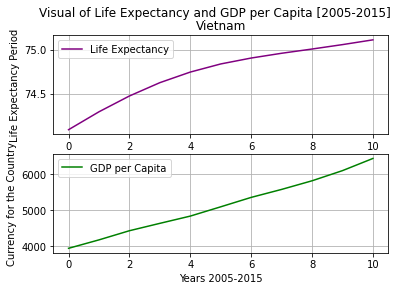

In [ ]:
visualizing_r_viet = visualize_corr(calculating_r_viet,viet_filtering,viet_filtering,"Vietnam")

# Interpreting Pearson's correlation

Our first portion of our project will analyze **the correlation between life expectancy and GDP per capita for each of our chosen countries**. As Pearson's correlation coefficient is defined as the strength and direction of the relationship between two chosen variables, interpretations of this metric include positive or negative along with very weak, weak, moderate, strong, or very strong correlation. 

***Direct correlation*** is a term to describe a relationship where if one variable increasses, the other variable will increase as well. *Inverse correlation* is the opposite where if one variable changes, the other will inversely change in the other direction.



Especially as statistics is the foundation of data science research questions, we will be following the standardized metrics below for interpretating correlation types.

***r correlation values:***
Very Weak:      0-0.19
Weak:           0.2-0.39
Moderate:       0.4-0.59
Strong:         0.6-0.79
Very Strong:    0.8-1.0

***correlation coefficient signs:***
positive coefficient: greater than 0
- positive correlation
- if independent variable increases, then negative variable tends to increase

negative coefficient: less than 0
- negative correlation
- if independent variable increases, then negative variable tends to decrease




### **Interpreting the Output & Correlation**

Refering to the statistics above, we will be explaining the correlation output between life expectancy and GDP per capita for each of our countries (2005-2015).

As shown above, in respect to the correlation between GDP and life expectancy from 2005-2015
- **Australia, Bolivia, and Vietnam had a very strong correlation** 
  
  **The case of Australia:** Of all our countries, Australia had the highest life expectancy. Also **after 2008**, Australia overtakes the US in having the highest GDP per capita of our countries analyzed. This means that for the majority of our period analyzed, Australia had the **highest gdp per capita** and **life expectancy**. This makes Australia our prime example of our hypothesis, that a high life expectancy means a country's population has more health care, and general well being contributing to an increased GDP. This especially helps our hypothesis, as we see Australia had a higher life expectancy before its GDP per capita rose above the US'.
  
  We were surprised to find **Bolivia** and **Vietnam** in the strongly correlated results, as we had expected them to lack correlation. These countries have life expectancies that are not terribly far off from Australia's. In 2015, Australia's life expectancy was 82.4 years, Vietnam's was 75.11 years, and Bolivia's was 70.28 years. Yet, Bolivia and Vietnam had much smaller GDP per capitas than Australia. What we can say, is that although they had smaller GDP per capitas, these statistics did increase throughout our time period. That means that Bolivia and Vietnam show that a high life expectancy can improve GDP per capita in a country.
   
- **United States had a moderate correlation**

  Our results for the **United States** originally disappointed us, as we expected a stronger correlation for this wealthy country. Yet this made us question other factors that could be affecting the correlation. We explored this below through country population and income inequality.
- **Ukraine had no correlation**

  In 2015, Ukraine had a life expectancy most similar to Bolivia, at 71.19 years. Yet, Ukraine's 2015 GDP per capita was $ 2,124.66 USD this is less than Bolivia's 3,414.89 USD. 
  The most important thing to note is that Ukraine was engaged in **war** with Russia during this time. The Russo-Ukrainian War officially began on February 20, 2014 as Russia annexed Crimea from Ukraine. Building up to this point, created a tense period for Ukraine which would explain the lowered GDP.

# **Was our Hypothesis 1 Successful?**

Hypothesis 1 stated previously: 

**"We hypothesize that countries with higher development (human development index) are more likely to experience higher correlation between life expectancy and GDP per capita due to individuals being able to live longer, earn more income, and contribute to their country's economy for a longer period of time."**

As our hypothesis was that more developed counties have higher correlations between life expectancy and GDP per capita, this section will analyze whether this hypothesis test was successful.


***2020 Human Development Index Reports: ***

***Australia:*** 0.951

***Bolivia:*** 0.692

***Ukraine:*** 0.773

***United States:*** 0.921

***Vietnam:*** 0.703

# **Outcomes from Above:**

**Autralia: 0.985 correlation**

With a pearson's correlation value of 0.985, Australia seems to have a higher correlation than Bolivia, Ukraine, United States, and Vietnam. As Australia does have high socioeconomic standing being considered a first world country, **our hypothesis was supported in this case** that Australia did have a higher correlation than the other second and thid world countries such as Bolivia, Ukraine, and Vietnam.

**Bolivia: 0.984 correlation**

With a pearson's correlation value of 0.984, Bolivia did have a higher correlation between life expectancy and GDP than United States, Vietnam, and Ukraine. Our **hypothesis was not supported in this case**, as even though the U.S.,Vietnam, and Ukraine had higher HDI values, Bolivia still had a higher correlation value in comparison.

**Ukraine: -0.064 correlation**

With a pearson's correlation value of -0.064, Ukarine had the second lowest correlation between life expectancy and GDP per capita despite having the third highest HDI value out of these 5 countries. In this case of Ukraine, **our hypothesis was not supported** because Ukraine even had a negative and no correlation between life expectancy and GDP for 2005-2015. 

**United States: 0.445**

With a pearson's correlation value of 0.445, the United States had the second lowest correlation out of these 5 countries. Our **hypothesis in this scenario was not supported**, as even though the U.S. had the second highest HDI value, its correlation between life expectancy and GDP per capita was lower than Bolivia, and Vietnam.

**Vietnam: 0.952**

With a pearson's correlation value of 0.952, Vietnam had the third highest correlation out of all these 5 chosen countries. Our hypothesis was partially supported in the circumstance, as Vietnam had a greater correlation compared to Bolivia, which is a less developed country according to the HDI. However Vietnam had a higher correlation that the United States, (contrary to our expected hypothesis) despite the U.S. having a much higher HDI.

# Expanding on America's results, through a comparison with Australia

These results made us question what factors could be affecting the correlation between GDP and life expectancy. Our thoughts landed on two main factors:


1.   Country population
2.   Income Inequality in a nation

If a country is vastly populated, then its GDP might not be as distributed amongst all its citizens. This would therefore have less of a positive result amongst citizen life expectancy. The United States for example is our largest populated country in our study. Yet the United States had a moderate correlation compared to Australia's (a smaller nation) 
very strong correlation.

Looking further into the income inequality within the United States vs Australia, we found: 
*   Using the World Inequality Database, we can quickly compare the income distributions within Australia and the United States for the years 2005-2015
*  Comparing these two countries shows that the US experiences a more rapidly changing share for the top 1% of the population, whereas Australia's top 1% holds a more constant share
*  In 2015, Austalia's top 1% held 16.2% of the nation's income
*  In 2015, the United States' top 1% held 18.9% of the nation's income

Again, factoring in population:
*  In 2015, Australia's total population was 23.82 million
*  In 2015, US' total population was 320.7 million

This means that 3,207,000 US citizens held 18.9% of the total income.
While 238,200 Australian citizens held 16.2% of the total income.

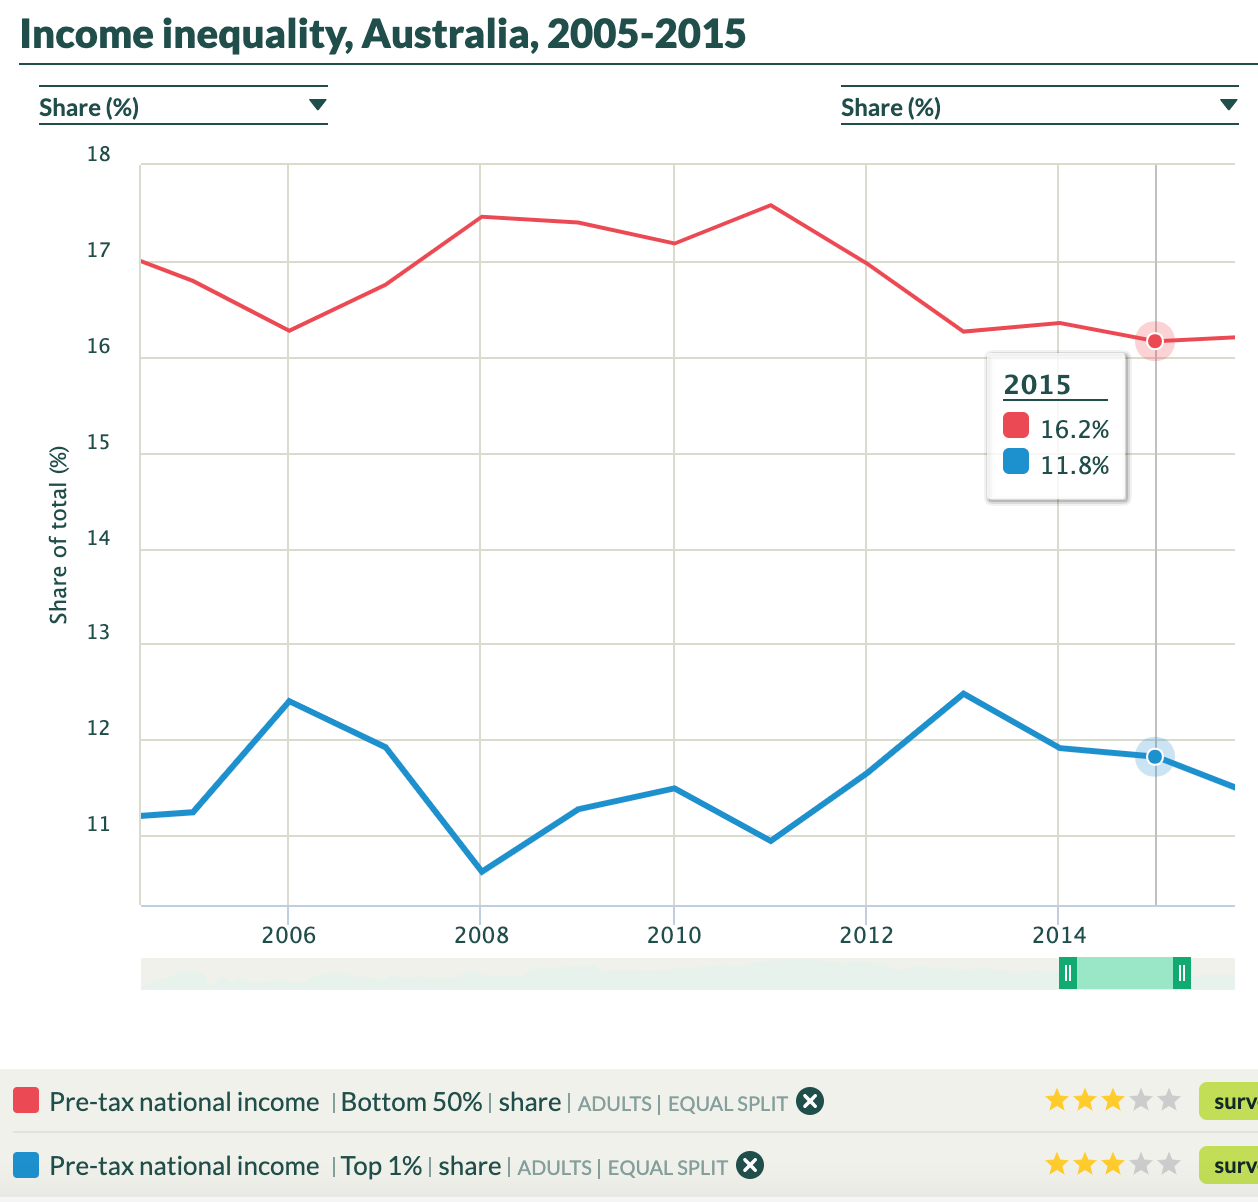

Source: https://wid.world/country/australia/

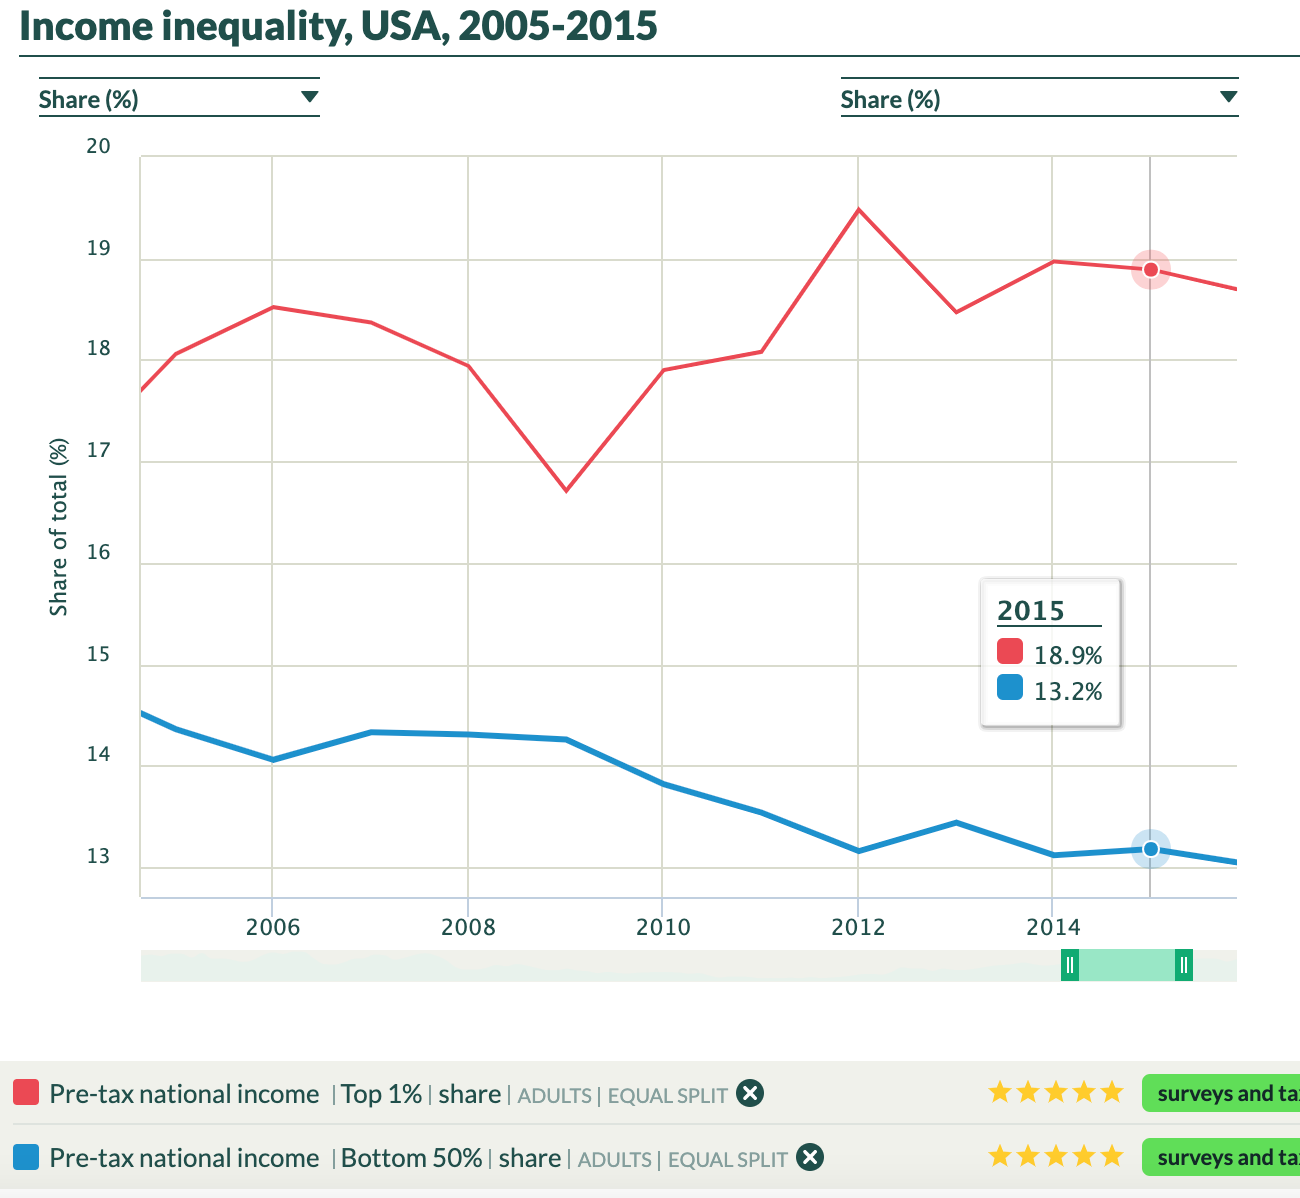

Source: https://wid.world/country/usa/

# Analyzing Hypothesis 1: 

Our findings suggest that **perhaps the opposite of our hypothesis is supported**. If a country has a high GDP per capita, they are able to afford better healthcare for its citizens, thus strengthening its life expectancy. Our correlation test for America strengthens this argument, as we found that America's large population does not have an equal income distribution, then life expectancy might not be what is supporting its high GDP per capita. 

Based on our observations and perspectives, we think life expectancy is something that takes years to see effects take place. So in the case of Ukraine, where their GDP Per Capita had a decreasing trend for a couple year, their life expectancy continued increasing. 

**For future data analysis**: researchers could focus on specific changes in government regulation which could affect GDP to then study how life expectancy changes as a result. This would require a larger range of years for the study to show more generations impacted by the government regulation.

# Hypothesis 2:
The results from our first experiment led us to further question the growth of GDP per Capita. 

**We now hypothesize that GDP per capita can be "accurately" calculated with a growth rate model** with the conditions explained throughout this portion of our project. To do this, we will construct a growth rate model and apply it to years of GDP per capita for several countries (5 countries: United States, Vietnam, Bolivia, Ukraine, Australia) to test our model. 

We will then check the difference between our calculated GDP per capitas and the actual reported GDP per capitas for those years. ***We will consider this a failed experience if we fail to accurately predict 3 out of the 5 future years (2016-2020) with a margin of error of $5,000 for finding GDP per Capita. ***

### **Predicting GDP per Capita Based on Calculated Growth Rates**

As GDP per capita is one of the metrics to measure countries' economic wellbeing, we also wanted to apply our financial knowledge and construct a function that can calculate GDP growth rates based on the previous years' GDP per capita. We will be using the formula below as the foundational component of our GDP prediction function.

## **Growth Rate = (Most recent GDP - Second most recent GDP) / (second most recent GDP)**

As we are evaluating our 5 chosen countries from 2005-2015 and the current year being 2022, we wanted to construct and utilize a GDP function to predict GDP per capita from 2016-2030. Not only can we use this prediction function to check how accurate our modeling is with the actual GDP per capita from 2016-2021 in our large csv files, but we can also see our own predicted trends for 2023-2030 for each of our 5 countries across the globe.

In [ ]:
    
def predict_gdp(gdp_list_data,country_name):
    """
    This function includes our GDP per capita growth rate equation which is then printed 
    It takes in our list of GDP per capita data and the given country name
    """
       
    #initialize lists
    gdp_list = []
    gdp_prediction_list = []
    
    #iteraing through list of lists
    for element in gdp_list_data[0]:
        
        gdp_list.append(element)
        gdp_prediction_list.append(element)
        
    #computing growth rates 
    
    count = 0
    
    #after reading through the 10 values of GDP from the csv files, we will begin computing growth rate for the subsequent time period
    for j in gdp_list:
        if count == 10:
            most_recent_gdp = j
        elif count == 9:
            second_most_recent_gdp = j
        count +=1
        
    #year for this last value is 2015 according to our set time parameters 
    
    #2022-2015 = 7     7 years 
    
    #fornula for growth rate
    growth_rate = ( most_recent_gdp - second_most_recent_gdp ) / second_most_recent_gdp 
  
    
    counter = 0
    #time period we want for number of years to compute for
    while counter < 15:
    
        #financial formula to compute growth rate
        predicted_gdp = most_recent_gdp * (1 + growth_rate)
        
        second_most_recent_gdp = most_recent_gdp
        
        most_recent_gdp = predicted_gdp #replacing the value as next predicted one after computing
        
        #appending prediction to existing data list from csv file
        gdp_prediction_list.append(predicted_gdp)
        
        counter += 1
    
    STARTER_YEAR = 2005
    
    print('                            ',country_name,'GDP per Capita Prediction')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('|                                                                                                |')
    print("|                                   Existing Data from CSV Files                                 |")
    print('|                           ','~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~','                              |')
    
    for value in gdp_prediction_list:

        value = round(value,4)
        
        print('|                                     ',STARTER_YEAR,' |',value,'                                       |')
        
        if STARTER_YEAR == 2015:
            print('|                                                                                                |')
            print("|                GDP per Capita Future Predictions Based on Calculated Growth Rates              |")
            print('|             ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~           |')
        STARTER_YEAR += 1

    print('|                                                                                                |')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print()

    #plotting the GDP per capita from 2005-2030
    plt.plot(gdp_prediction_list,label="GDP per capita")
    
    counter_plot = 0
    
    start = 2005
    
    #loop to iterate through list and place labels!
    for i in gdp_prediction_list:
        
        start += 1
        if start > 2022:
            plt.plot(counter_plot,i,marker='*',label=start)
            plt.text(counter_plot,i,start,color="purple")      
        
        counter_plot += 1

    #labels for plot
    plt.title("Prediction of GDP per capita: "+country_name)
    plt.legend()
    plt.xlabel("Years 2005-2030")
    plt.ylabel("GDP per Capita")
    plt.show()


# **Interpreting Outcomes of GDP Prediction Model**

This section of our data analysis and prediction model will evaluate whether our model was **reasonably close** to the existing data in the CSV files from (2016-2020) for each of our chosen countries. 

To standardize our method for checking our predictions in relation to the actual reported GDP per capita, **we will consider "reasonable" predictions to be within 5,000 of the actual GDP**. If our prediction model is able to predict **"reasonable" calculations 4 out of the 5** years, we will consider our function successful! 

In [ ]:
def predict_gdp(gdp_list_data,country_name):
    """
    This function returns a list of our calculated GDP per capitas
    It takes in our list of GDP per capita data and the given country name
    """
    # creating empty lists   
    gdp_list = []
    gdp_prediction_list = []
    growth_rate_list = []
    
    for element in gdp_list_data[0]:
        
        gdp_list.append(element)
        gdp_prediction_list.append(element)
        
    # computing growth rates 
    
    count = 0
    
    for j in gdp_list:
        if count == 10:
            most_recent_gdp = j
        elif count == 9:
            second_most_recent_gdp = j
        count +=1
        
    # year for this last value is 2015 according to our set time parameters 
    
    #2022-2015 = 7     7 years 
    
    print()
    
    #calculating growth rate based on formula explained
    growth_rate = ( most_recent_gdp - second_most_recent_gdp ) / second_most_recent_gdp 
    
    counter = 0
    while counter < 15: #for 15 years
        
        growth_rate_list.append(growth_rate) #appending to the lis
        predicted_gdp = most_recent_gdp * (1 + growth_rate) #formula applying to calculate predicted GDP to loop through list
        #replacing values for most recent & second most recent
        second_most_recent_gdp = most_recent_gdp
        most_recent_gdp = predicted_gdp
        
        #appending GDP prediction to list
        gdp_prediction_list.append(predicted_gdp)
        growth_rate = ( most_recent_gdp - second_most_recent_gdp ) / second_most_recent_gdp #applying growth rate formula
        
        counter += 1
    STARTER_YEAR = 2005

    print('                            ',country_name)
    print()
    
    print("                Existing Data from CSV Files")
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    
    #printing out output
    for value in gdp_prediction_list:
        print('                  ',STARTER_YEAR,' |',value)
        
        #if it's within time frame of 2015 or higher for prediction model
        if STARTER_YEAR == 2015:
            print()
            print("    GDP per Capita Future Predictions Based on Calculated Growth Rates")
            print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
        STARTER_YEAR += 1
    print()
    print() #plotting below
    plt.plot(YEARS_TEST,gdp_prediction_list,label="GDP per capita")
    
    # creating our plot labels
    plt.title("Prediction of GDP per capita: "+country_name)
    plt.legend()
    plt.xlabel("Years 2005-2030")
    plt.ylabel("GDP per Capita")
    plt.grid()
    plt.show()
    
    return gdp_prediction_list

In [ ]:
def filter_years_cross_check(country_list_gdp,country_list_exp,country_name):
    """
    This function filters for the cross check years and returns a list with these years examined for both gdp per capita and life expectancy
    It takes in our country list of gdp per capita, and list expectancy, alongwith the given country name

    Parameters: 
    - list of gdp
    - list of life expect
    - country name

    Return: list of gdp data, list of life exp
    """
    YEARS_CROSS_CHECK = [2016,2017,2018,2019,2020]
    gdp_list_data = []
    life_list_data = []

    #iterating through list
    for i in country_list_gdp:
        
        entity_check = i['Entity'] #name check
        year_check_gdp = i['Year'] #year check
        #checking for country_name and in years timeframe
        if entity_check == country_name and year_check_gdp in YEARS_CROSS_CHECK :
            gdp_check = i['GDP per capita']
            gdp_list_data.append(gdp_check)  
            
    #iterating through list of country life expect
    for j in country_list_exp:
         
         entity_check = j['Entity'] #name of country
         year_check_life = j['Year'] # year check
         
         if entity_check == country_name and (year_check_life in YEARS_CROSS_CHECK ):
        #checking for timeframe, name, and year
             exp_check = j['Life expectancy'] #checking life exp
             #appending
             life_list_data.append(exp_check)

    return gdp_list_data,life_list_data

In [ ]:
def cross_check_calc(new_gdp_years,new_life_years,country_name,predict_gdp_list):
    """
    This function calculates the difference between our caluclated results with the actual data results from 2016-2020
    It takes in our GDP per capita and life expectancy years, given country name, and our calculated list of GDP per capita values

    Parameters: dictionary of gdp expect, dictionary of gdp life expect, country name, gdp list

    Return: none
    """
    # looking at the actual data from 2016-2020 to compare with our calculations
    YEARS_CROSS_CHECK = [2016,2017,2018,2019,2020]
    print()

    csv_list = []
    diff_count = 0
    
    # iterating through list
    for i in new_gdp_years[0]:
        csv_list.append(i)
        
    print('----------------------------------------------------------------------------')
    print('                              ',country_name,'                             ')
    print('                             ------------------                           ')
    print('                                                                          ')
    x = 0
    year_start_point = 2005
    for m in predict_gdp_list:
        #printing our cross check
        if year_start_point in YEARS_CROSS_CHECK:
            #displaying differences
            difference = m - csv_list[x]
            difference_n = round(difference,2) #round 
            rounded_m = round(m,2) #round
            
            rounded_csv = round(csv_list[x],2)
            # printing a visual statement with our results
            print('                                   ',year_start_point,'                                 ')
            print('             Reported GDP per Capita:',"                ",rounded_csv,'          ')
            print("             Predicted GDP (Growth Rates Model)       ",rounded_m,'          ')
    
            print('                                                                          ')
            print("             Difference:                              ",difference_n,'           ')
            print('                                                                         ')
            print('----------------------------------------------------------------------------')
            
            #checking if it's a reasonable test
            if difference_n < 5000:
                diff_count += 1
            x += 1
        year_start_point += 1
    
    print()
    if diff_count >= 4:
        # printing our result statements
        print("Reasonable calculations count:",diff_count,"/ 5")
        print("Our growth rate model for GDP Predictions (2016-2020) for",country_name,"was successful!")
        

## **Predicting GDP per Capita for United States (2016-2023)**

The first portion of the output displays the GDP per Capita from the existing data from CSV files (2005-2015) as well as our future predictions based on the growth rate model.

Next, **The second portion of this output is a visual representation** of our GDP predictions with 2023-2031 labeled with markers, as these are predictions for the ongoing future.

**United States Prediction Model:**


                             United States

                Existing Data from CSV Files
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                   2005  | 54353.0703125
                   2006  | 55368.359375
                   2007  | 55873.24609375
                   2008  | 55271.65625
                   2009  | 53399.3671875
                   2010  | 54315.9140625
                   2011  | 54758.83203125
                   2012  | 55581.4140625
                   2013  | 56214.4296875
                   2014  | 57213.26953125
                   2015  | 58540.296875

    GDP per Capita Future Predictions Based on Calculated Growth Rates
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                   2016  | 59898.103819103
                   2017  | 61287.404277859525
                   2018  | 62708.92872438251
                   2019  | 64163.424574669
                   2020  | 65651.65658058014
                   2021  | 

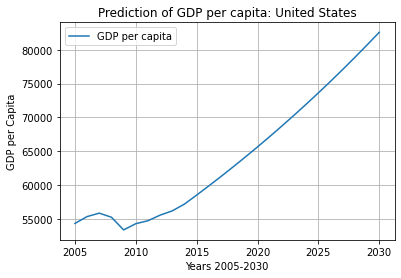

In [ ]:
predicting_us_gdp = predict_gdp(USA_filtering,"United States")

**Australia Prediction Model Output:**


                             Australia

                Existing Data from CSV Files
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                   2005  | 42222.2734375
                   2006  | 42738.46484375
                   2007  | 44072.8828125
                   2008  | 44743.66015625
                   2009  | 44649.16015625
                   2010  | 44914.98046875
                   2011  | 45389.171875
                   2012  | 46350.921875
                   2013  | 46744.6328125
                   2014  | 47232.875
                   2015  | 47569.29296875

    GDP per Capita Future Predictions Based on Calculated Growth Rates
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                   2016  | 47908.107087420954
                   2017  | 48249.334422682834
                   2018  | 48592.99216276362
                   2019  | 48939.09761831511
                   2020  | 49287.668223284876
                   2021  

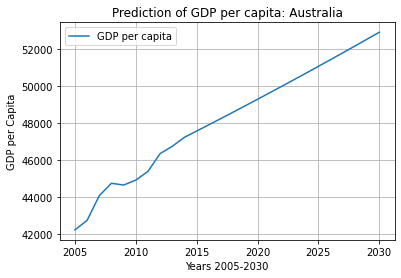

In [ ]:
predicting_aust_gdp = predict_gdp(aust_filtering,"Australia")

**Bolivia Prediction Model Output:**


                             Bolivia

                Existing Data from CSV Files
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                   2005  | 5749.53173828125
                   2006  | 5920.7099609375
                   2007  | 6085.38623046875
                   2008  | 6351.22607421875
                   2009  | 6455.96826171875
                   2010  | 6612.80322265625
                   2011  | 6844.98388671875
                   2012  | 7081.38623046875
                   2013  | 7444.49072265625
                   2014  | 7730.63818359375
                   2015  | 7984.412109375

    GDP per Capita Future Predictions Based on Calculated Growth Rates
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                   2016  | 8246.51668055408
                   2017  | 8517.225367514246
                   2018  | 8796.820617860441
                   2019  | 9085.594151114863
                   2020  | 9383.8472630865
  

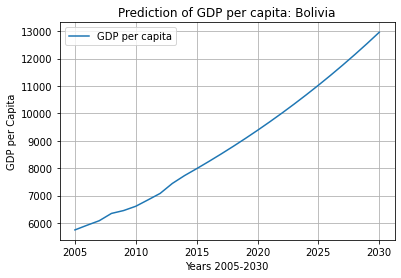

In [ ]:
predicting_bolivia_gdp = predict_gdp(bolivia_filtering,"Bolivia")

**Ukraine Prediction Model Output:**


                             Ukraine

                Existing Data from CSV Files
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                   2005  | 11319.5107421875
                   2006  | 12259.158203125
                   2007  | 13345.771484375
                   2008  | 13719.271484375
                   2009  | 11694.4482421875
                   2010  | 12221.4404296875
                   2011  | 12933.3564453125
                   2012  | 12985.0869140625
                   2013  | 13020.6005859375
                   2014  | 12385.8134765625
                   2015  | 11216.1181640625

    GDP per Capita Future Predictions Based on Calculated Growth Rates
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                   2016  | 10156.886901959631
                   2017  | 9197.687651842063
                   2018  | 8329.073559392105
                   2019  | 7542.489915263749
                   2020  | 6830.18990241783

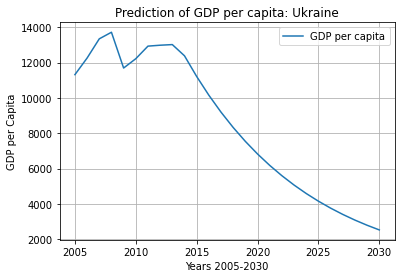

In [ ]:
predicting_ukraine_gdp = predict_gdp(ukraine_filtering,"Ukraine")

**Vietnam Prediction Model Output:**


                             Vietnam

                Existing Data from CSV Files
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                   2005  | 3931.76538085938
                   2006  | 4167.107421875
                   2007  | 4422.28515625
                   2008  | 4628.02978515625
                   2009  | 4830.30517578125
                   2010  | 5089.4111328125
                   2011  | 5352.02197265625
                   2012  | 5574.49365234375
                   2013  | 5815.17529296875
                   2014  | 6098.5390625
                   2015  | 6438.259765625

    GDP per Capita Future Predictions Based on Calculated Growth Rates
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                   2016  | 6796.904698790831
                   2017  | 7175.528041149203
                   2018  | 7575.242695175389
                   2019  | 7997.223557866224
                   2020  | 8442.71097416104
         

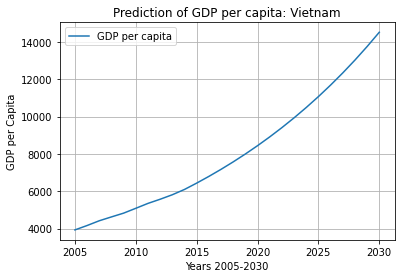

In [ ]:
predicting_vietnam_gdp = predict_gdp(viet_filtering,"Vietnam")

## **Cross-Checking Our Predicted GDP Growth Model**

**Australia Cross-Checking:**

In [ ]:
cross_check_aust = filter_years_cross_check(cleaning_gdp_aust,life_aust,"Australia")
  
cross_calc_aust = cross_check_calc(cross_check_aust,cross_check_aust,"Australias",predicting_aust_gdp)


----------------------------------------------------------------------------
                               Australias                              
                             ------------------                           
                                                                          
                                    2016                                  
             Reported GDP per Capita:                  48116.03           
             Predicted GDP (Growth Rates Model)        47908.11           
                                                                          
             Difference:                               -207.92            
                                                                         
----------------------------------------------------------------------------
                                    2017                                  
             Reported GDP per Capita:                  48398.55           
             Predicted G

**Bolivia Cross-Checking:**

In [ ]:
cross_check_bolivia = filter_years_cross_check(cleaning_gdp_bolivia,life_bolivia,"Bolivia")

cross_calc_bolivia = cross_check_calc(cross_check_bolivia,cross_check_bolivia,"Bolivia",predicting_bolivia_gdp)


----------------------------------------------------------------------------
                               Bolivia                              
                             ------------------                           
                                                                          
                                    2016                                  
             Reported GDP per Capita:                  8202.54           
             Predicted GDP (Growth Rates Model)        8246.52           
                                                                          
             Difference:                               43.97            
                                                                         
----------------------------------------------------------------------------
                                    2017                                  
             Reported GDP per Capita:                  8423.7           
             Predicted GDP (Growt

**United States Cross-Checking:**

In [ ]:
cross_check_us = filter_years_cross_check(cleaning_gdp_usa,life_usa,"United States")
cross_calc_us = cross_check_calc(cross_check_us,cross_check_us,"United States",predicting_us_gdp)


----------------------------------------------------------------------------
                               United States                              
                             ------------------                           
                                                                          
                                    2016                                  
             Reported GDP per Capita:                  59112.24           
             Predicted GDP (Growth Rates Model)        59898.1           
                                                                          
             Difference:                               785.86            
                                                                         
----------------------------------------------------------------------------
                                    2017                                  
             Reported GDP per Capita:                  60109.66           
             Predicted 

In [ ]:
cross_check_ukraine = filter_years_cross_check(cleaning_gdp_ukraine,life_ukraine,"Ukraine")
cross_calc_ukraine = cross_check_calc(cross_check_ukraine,cross_check_ukraine,"Ukraine",predicting_ukraine_gdp)


----------------------------------------------------------------------------
                               Ukraine                              
                             ------------------                           
                                                                          
                                    2016                                  
             Reported GDP per Capita:                  11536.32           
             Predicted GDP (Growth Rates Model)        10156.89           
                                                                          
             Difference:                               -1379.43            
                                                                         
----------------------------------------------------------------------------
                                    2017                                  
             Reported GDP per Capita:                  11860.56           
             Predicted GDP

In [ ]:
cross_check_vietnam = filter_years_cross_check(cleaning_gdp_viet,life_viet,"Vietnam")
cross_calc_vietnam = cross_check_calc(cross_check_vietnam,cross_check_vietnam,"Vietnam",predicting_vietnam_gdp)


----------------------------------------------------------------------------
                               Vietnam                              
                             ------------------                           
                                                                          
                                    2016                                  
             Reported GDP per Capita:                  6767.78           
             Predicted GDP (Growth Rates Model)        6796.9           
                                                                          
             Difference:                               29.13            
                                                                         
----------------------------------------------------------------------------
                                    2017                                  
             Reported GDP per Capita:                  7155.44           
             Predicted GDP (Growt

### **Interpreting the Outcome of GDP Growth Model**

As previously explained, our GDP calculation model is our attempt at applying our mathematical, financial, and programming skillsets to this project. Building upon our last section that had stated that **a 4/5 reasonable calculation count is considered a "successful" calculation**, we will be explaining the outcome of our growth model and any discrepancies and connections to current events for any "unreasonable" GDP per capita calculations. 

**Disclaimer**: We understand **that our calculations of a predicted GDP per capita is not a perfect system**, as we are simply using growth rates based on prior years as a standard of comparison. 

# Reasons for differences in calculation vs real reported GDP per capitas

## **Explaining United States (2020)**

Referencing our output and difference in GDP per capita between our prediction model and CSV files for 2020, our calculated GDP for that year was 5731.84 away from the actual GDP. **Possible reasons for our calculated GDP being over 5700+ away from the actual reported GDP is likely attributed due to the outbreak of the Covid-19 affected the overall national economy.**

Especially since adjusting to the pandemic lockdown meant many small businesses, corporations, and employees having to halt their work temporarily before workplaces adjusted to a more virtual environment, this economic shutdown seems to have affected the country's GDP for that year.

# The Case of Ukraine

Upon examining our Ukraine predicted GDP per Capita values based on our growth model vs the actual GDP per Capita we can see a discrepancy for the 2016-2020 period. **We have seemingly calculated growth rates that were overly pessimistic for Ukraine:**


    GDP per Capita Future Predictions Based on Calculated Growth Rates
                   2016  | 10156.886901959631
                   2017  | 9197.687651842063
                   2018  | 8329.073559392105
                   2019  | 7542.489915263749
                   2020  | 6830.189902417837   

    Actual GDP per Capita Reported for 2016-2020
                   2016  | 11536.31640625
                   2017  | 11860.560546875
                   2018  | 12336.9267578125
                   2019  | 12804.955078125
                   2020  | 12804.955078125

Our 2020 prediction of 6,830 is half of the actual reported GDP per capita of 12,804. To understand why this happened, we can re-analyze Ukraine's situation in 2014. 

    Actual GDP per Capita Reported for 2013-2014
                   2013  | 13020.6005859375
                   2014  | 12385.8134765625
                   2015  | 11216.1181640625
Ukraine achieved Independence from the USSR in 1991. Yet economic mismanagement, political corruption, and periods of voter fraud held back Ukraine's GDP Growth in the decades after. Going into 2013, Ukraine struggled with budget imbalances along with gas sector deficits. They had problems exporting goods as Russia was one of their biggest trade partners, yet Russia invaded Crimea in early 2014, halting productive trade and taking away major resources from Ukraine. These are reasons for why we believed Ukraine's GDP growth rate would be decreasing for the following 2016-2020 period. 

    In 2015: The IMF Enters the Chat

However, what we were not aware of is that the Internation Monetary Fund approved of granting Ukraine 17.5 billion USD in a financing four-year program. The IMF stated in a March 11, 2015 press release:

"The program aims to put the economy on the path to recovery, restore external sustainability, strengthen public finances, and support economic growth by advancing structural and governance reforms, while protecting the most vulnerable." (https://www.imf.org/en/News/Articles/2015/09/14/01/49/pr15107)

**With this in mind, Ukraine's economy was supplemented by the IMF, therefore creating a better rate of change for GDP growth than initially expected. This increase in money supply, allowed Ukraine to work on stabilizing its economy for a  therefore creating a 2020 actual GDP per capita that was similar to its 2014 reportings. **




# **Calculating & Displaying Moving Averages (Every 5 years)**

# ***Moving Average:***

A moving average is defined as a method to calculate average within a certain time period by creating a series of averages within subsets of full data.

In [ ]:
def avg(L):
    """
    Compute the numerical average of a list of numbers and return 
    If list is empty, return 0.0
    """
    if len(L) > 0:
        return sum(L) / len(L)
    else:
        return 0.0

def get_window(L, idx, window_size=1):
    
    """ Extract a window of values of specified size
    centered on the specified index
    L: List of values
    idx: Center index
    window_size: window size
    """
    minrange = max(idx - window_size // 2, 0)
    maxrange = idx + window_size // 2 + (window_size % 2)
    return L[minrange:maxrange]

def moving_average(L, window_size=2):
    
    """ Compute a moving average over the list L
    using the specified window size
    L: List of values
    window_size - The window size (default=1)
    return - A new list with smoothed values
    """
    # creating emppty list
    mavg = []
    for i in range(len(L)):
        window = get_window(L, i, window_size)
        # appending to lists
        mavg.append(avg(window))
    # returning the lists of moving average score
    return mavg

In [ ]:
def filter_years_vis(country_list_gdp,country_list_exp,country_name):
    """
    This function returns filtered lists of gdp per capita and life expectancy data, so we can use in a visualization
    It takes in our current country list of GDP per capita data, country list of life expectancy data, and the given country name
    """
    # created empty lists
    gdp_list_data = []
    life_list_data = []
    # creating a dictionary where the key "year" is set to a value of year
    years_dict = {"year":1989}
    # creating for loop to run through life expectancy within a given country
    for j in country_list_exp:
         # entity is the same as country name, just called entity in dataset
         entity_check = j['Entity']
        # checking for year key
         year_check_life = j['Year']
         # making year key increase
         years_dict["year"] = years_dict["year"] + 1
         # if the year is greater than 1989, i.e. 1990 and above, and is the country given:
         if year_check_life > 1989 and entity_check == country_name:
               # expectancy is the value to the key 'life expectancy'  
             exp_check = j['Life expectancy']
                         
                 # appending to our list
             life_list_data.append(exp_check)
      # returning lists of gdp data and life expectancy data with filtered info from 1990 to 2019
    return gdp_list_data,life_list_data

In [ ]:
def vis_line(data_list_us,data_list_bol,data_list_aust,data_list_viet,data_list_ukraine): 
    """
    This function calls the moving averages and uses a while count to go through our 5 case countries
    It creates a chart display our moving averages
    """
    
    # calling the moving average function for our 5 countries, with 5 year window size
    calc_mov_us = moving_average(data_list_us[1],window_size=5)
    calc_mov_bol = moving_average(data_list_bol[1],window_size=5)
    calc_mov_aust = moving_average(data_list_aust[1],window_size=5)
    calc_mov_viet = moving_average(data_list_viet[1],window_size=5)
    calc_mov_ukraine = moving_average(data_list_ukraine[1],window_size=5)
    # creating a list to hold all our calculated moving averages
    list_mov_avg = [calc_mov_us,calc_mov_bol,calc_mov_aust,calc_mov_viet,calc_mov_ukraine]
    
    count =0
    # using a while count to go through the 5 countries
    while count < 5:
        for i in list_mov_avg:
            # plotting our points as a dot on a line
            plt.plot(list(range(len(i))),i,marker='.')
            count += 1
    
    # labeling our chart
    plt.ylabel("Life Expectancy Period")
    plt.xlabel("Intervals of Years")
    plt.grid()
    plt.title("Moving Average of Life Expectancy [1990-2019]")
    # creating a legend to differentiate our countries
    plt.legend(["United States","Bolivia","Australia","Vietnam","Ukraine"])

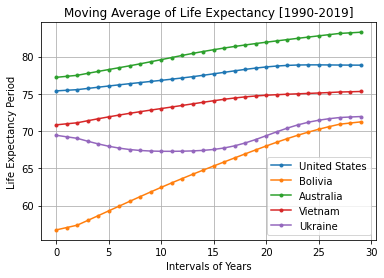

In [ ]:
# calling our filter year visual functions
USA_filter_v = filter_years_vis(cleaning_gdp_usa,life_usa,"United States")
  
bolivia_filter_v = filter_years_vis(cleaning_gdp_bolivia,life_bolivia,"Bolivia")
  
aust_filter_v = filter_years_vis(cleaning_gdp_aust,life_aust,"Australia")
  
viet_filter_v = filter_years_vis(cleaning_gdp_viet,life_viet,"Vietnam")
  
ukraine_filter_v = filter_years_vis(cleaning_gdp_ukraine,life_ukraine,"Ukraine")

# calling our visual with our 5 countries
vis_graph = vis_line(USA_filter_v,bolivia_filter_v,aust_filter_v,viet_filter_v,ukraine_filter_v)

**Trends shown by the Moving Average of Life Expectancy:**
- Australia maintains the highest life expectancy of our countries over the full time period
- Bolivia has the highest growth as the average life expectancy changed from mid-50s to over 70 years within the 1990-2019 interval 
- United States trails Australia in average life expectancy
- Vietnam has consistent increasing life expectancy
- Ukraine's life expectancy dips in the middle of our interval before rebounding/stabilizing in the end

## **Conclusion**

Through analyzing the **life expectancy rates and GDP per capita** **across 10 years for 5 countries**, we were able to apply the skill sets of cleaning, **filtering, reading, and visualizing** data from our semester lectures. As we also **implemented and coded our own GDP per capita calculation model** for 2016-2020 to compare with the actual reported GDP, we were able to apply our financial formulas’ knowledge from our financial core classes! Lastly, we also c**alculated and visualized the moving averages of life expectancy** for each of the 5 countries from 1990-2019 to display global trends across the different regions.

**The strengths of our project include that we included over 10 years of data** for the ability to compare the outcomes as accurately as possible across countries, that we **specifically chose countries from different regions of Earth**, and that we connected every aspect of our results and conclusions to current events. For example, if our hypothesis was not supported or even just supported, we made sure to research underlying economic factors as connecting explanations !

Some limitations to keep in mind for our analysis is that we only analyzed two main factors of life expectancy and GDP per capita through our code as the foundation of our project to analyze their correlations. Especially as the economy is heavily impacted by many factors, we made sure to express this disclaimer in the beginning of the project as well! 

If we were to build upon this project further, potential ideas would be to analyze even more countries, add inflation growth rates for each of the countries, or even conduct more advanced regression tests on our data.

